**K-Nearest Neighbors (kNN)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/MLassg2"
%ls

Mounted at /content/drive
/content/drive/MyDrive/MLassg2
loan_data.csv


# Setting up the environment/Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Importing the dataset and visualizing it

In [ ]:
df = pd.read_csv("loan_data.csv")
print(df.head()) # this function shows only the 5 rows of the whole dataset


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

#Categorical encoding

In [ ]:
# Columns to encode
categorical_columns = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

# Label encode categorical features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
print(df.head()) # this function shows only the 5 rows of the whole dataset

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 3        12282.0               0   
2        25.0              0                 3        12438.0               3   
3        23.0              0                 1        79753.0               0   
4        24.0              1                 4        66135.0               1   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0                      3    35000.0            4          16.02   
1                      2     1000.0            1          11.14   
2                      0     5500.0            3          12.87   
3                      3    35000.0            3          15.23   
4                      3    35000.0            3          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                    

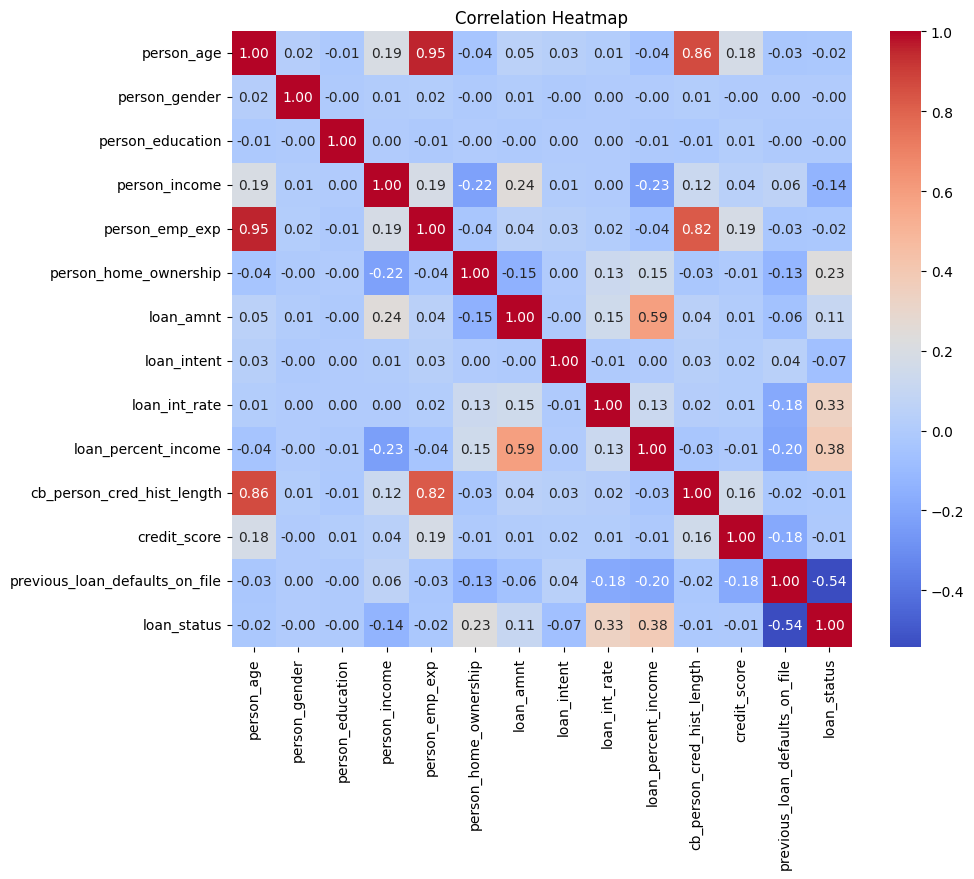

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap above shows the relationship between different features in the dataset, including how each one relates to loan status. From the heatmap, we can see that some features have a strong positive and negative correlation with loan status, such as previous_loan_defaults_on_file (-0.54), loan_percent_income (0.38), and loan_int_rate (0.33).

# Data Preperation


In [ ]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [ ]:
#null values
print("Null values in the dataset:\n", df.isna().sum())

Null values in the dataset:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [ ]:
# negative values
dataset = df.apply(pd.to_numeric, errors='coerce')
negative_values = (dataset < 0).sum()
print("Negative values in each column:\n", negative_values)


Negative values in each column:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


# Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#To view the training sets
print('80% of features for training: \n ', X_train)
print('\n \n')
print('80% of the predicted price for training: \n ', y_train)

80% of features for training: 
         person_age  person_gender  person_education  person_income  \
25180        34.0              0                 1        97265.0   
12555        25.0              1                 3        72953.0   
29153        41.0              0                 4       322597.0   
23838        27.0              1                 0        94232.0   
35686        27.0              1                 4        84873.0   
...           ...            ...               ...            ...   
11284        26.0              1                 3        88451.0   
44732        25.0              0                 3        34772.0   
38158        33.0              0                 0        58317.0   
860          26.0              1                 4       178602.0   
15795        26.0              0                 3       210894.0   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
25180              11                      0    15000.0           

In [ ]:
#To view the testing sets
print('20% of the features for testing: \n ', X_test)
print('\n \n')
print('20% of the prediced values for testing: \n ', y_test) # we use the y-s from testing to make a comparison after we predict on the 20% of the new features left for testing to see the error

20% of the features for testing: 
         person_age  person_gender  person_education  person_income  \
37979        32.0              1                 0        96865.0   
9911         24.0              1                 0        56838.0   
43386        22.0              0                 4        37298.0   
13822        23.0              0                 1        39944.0   
44810        42.0              1                 3        67974.0   
...           ...            ...               ...            ...   
14572        21.0              1                 1       133205.0   
30384        39.0              1                 3        61889.0   
36665        24.0              0                 4        78950.0   
30569        38.0              1                 0        37142.0   
5321         25.0              0                 3        35216.0   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
37979              10                      0     7500.0        

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Training and performance evaluation

Accuracy for k = 3: 88.31%


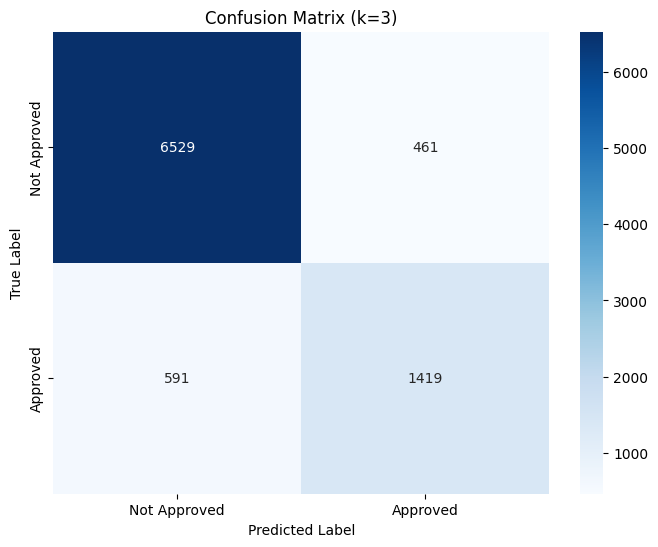

Accuracy for k = 5: 89.19%


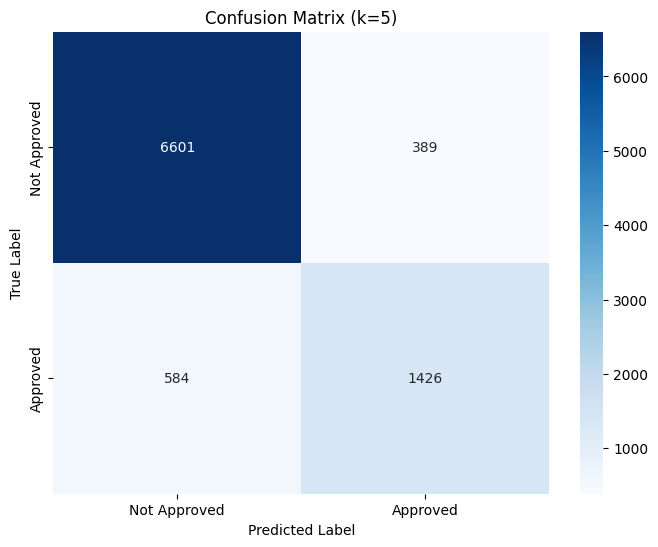

Accuracy for k = 7: 89.49%


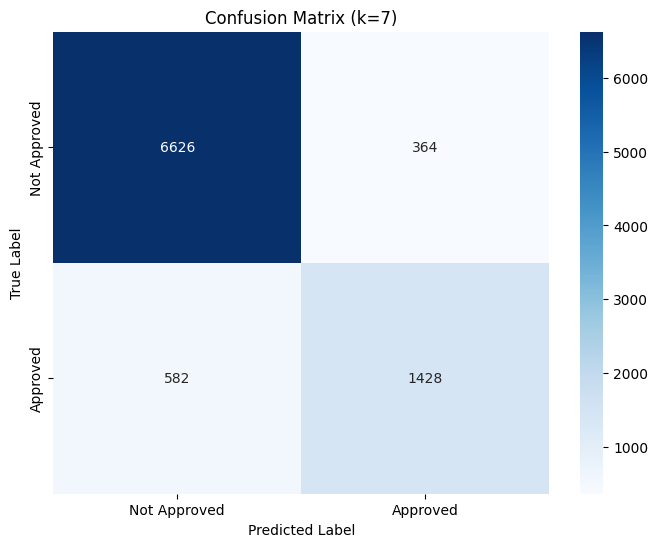

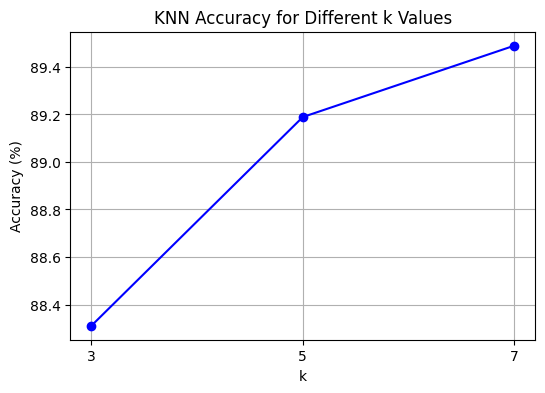

In [ ]:
k_values = [3, 5, 7]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for k = {k}: {acc * 100:.2f}%")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Not Approved", "Approved"],
        yticklabels=["Not Approved", "Approved"]
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (k={k})")
    plt.show()

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
plt.plot(k_values, [acc * 100 for acc in accuracies], marker='o', linestyle='-', color='blue')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.xticks(k_values)
plt.grid(True)
plt.show()